In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [368]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

print("Calories dataset shape:", calories.shape)
print("Exercise dataset shape:", exercise.shape)


Calories dataset shape: (15000, 2)
Exercise dataset shape: (15000, 8)


In [369]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [370]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [371]:
print("Calories columns:", calories.columns)
print("Exercise columns:", exercise.columns)


Calories columns: Index(['User_ID', 'Calories'], dtype='object')
Exercise columns: Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')


In [372]:
df = pd.merge(exercise, calories, on='User_ID')

print("Merged Data Shape:", df.shape)
print(df.head())


Merged Data Shape: (15000, 9)
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


In [373]:
df.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0


In [374]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [375]:
#sns.distplot(df['Age'])

<Axes: xlabel='Age', ylabel='Calories'>

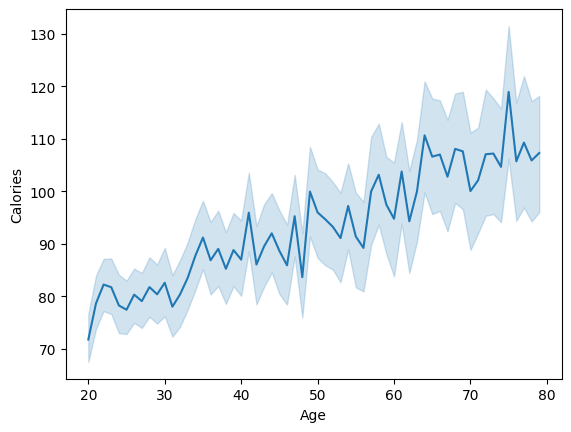

In [376]:
sns.lineplot(x='Age', y='Calories', data=df)


In [377]:
# train test split

In [378]:
# Encoding 
# Convert Gender text to numeric (safe if run multiple times)
df['Gender'] = df['Gender'].replace({'male': 1, 'female': 0})

print(df['Gender'].unique())


[1 0]


C:\Users\suman\AppData\Local\Temp\ipykernel_21388\1900172472.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'male': 1, 'female': 0})


In [379]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [380]:
df = df.fillna(0)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB
None


In [381]:
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (15000, 7)
y shape: (15000,)


In [382]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Train-test split done!")


✅ Train-test split done!


In [383]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("✅ Scaling done!")


✅ Scaling done!


In [324]:
x_train.shape

(12000, 7)

In [384]:
# training model 

In [394]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

for name, mod in models.items():
    mod.fit(x_train, y_train)
    y_pred = mod.predict(x_test)
    print(f"{name} → MSE: {mean_squared_error(y_test, y_pred):.2f}, R2: {r2_score(y_test, y_pred):.2f}")


Linear Regression → MSE: 132.00, R2: 0.97
Decision Tree → MSE: 28.04, R2: 0.99
RandomForest → MSE: 7.18, R2: 1.00
Support Vector Regressor → MSE: 29.58, R2: 0.99


In [395]:
# selecting model 
RandomForest = RandomForestRegressor()
RandomForest.fit(x_train,y_train)
y_pred = RandomForest.predict(x_test)

In [408]:
import pickle

# Assuming your best model variable is named "rf"
pickle.dump(models['RandomForest'], open('RandomForest.pkl', 'wb'))
